# Make A Feature Engineering Agent

### Free Generative AI Data Science Workshop

If you want to learn how to build AI Agents that perform Data Science, Business Intelligence, Churn Modeling, Time Series Forecasting, and more, [register for my next free AI for Data Scientists workshop here.](https://learn.business-science.io/ai-register)


### Load Libraries

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import os
import yaml
import pandas as pd
from pprint import pprint

from ai_data_science_team.agents import make_feature_engineering_agent
from ai_data_science_team.utils import get_mermaid_flowchart

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7f79588fd480>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7f78f8d358d0>, root_client=<openai.OpenAI object at 0x7f79288ffa00>, root_async_client=<openai.AsyncOpenAI object at 0x7f79588fd780>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Load a Dataset

Next, let's load a customer churn data set that we will clean up. 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent

Run this code to create the agent with `make_feature_engineering_agent()`.

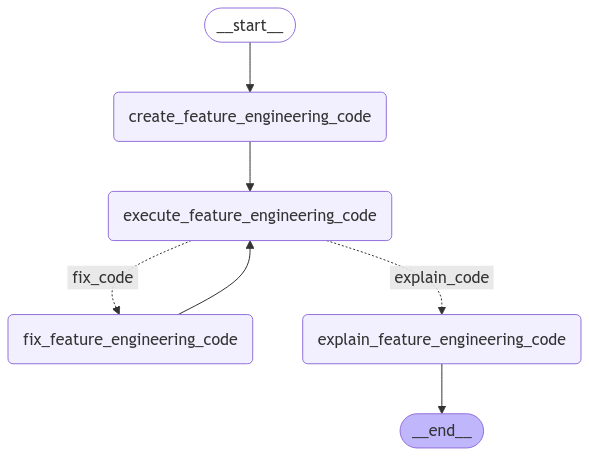

In [4]:
feature_engineering_agent = make_feature_engineering_agent(model = llm, log=LOG, log_path=LOG_PATH)

get_mermaid_flowchart(feature_engineering_agent)

The main inputs to the Feature Engineering Agent are:

- **user_instructions**: The data cleaning agent will use these comments to modify the "standard recipe" (optional). See the documentation for the standard feature engineering steps that are evaluated for application by the LLM. 
- **target_variable**: The column name of the target variable (optional).
- **data_raw**: The raw data to have engineered feature transformations applied.
- **max_retries**: Used to limit the number of attempts to fix the python code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [14]:
response = feature_engineering_agent.invoke({
    "target_variable": "Churn",
    "data_raw": df.to_dict(),
    "max_retries":3, 
    "retry_count":0
})

---FEATURE ENGINEERING AGENT----
    * CREATE FEATURE ENGINEERING CODE
    * EXECUTING AGENT CODE


<string>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


    * EXPLAIN AGENT CODE


### Response

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [15]:
list(response.keys())

['messages',
 'data_raw',
 'target_variable',
 'feature_engineer_function',
 'feature_engineer_error',
 'data_engineered',
 'max_retries',
 'retry_count']

### The cleaning recipe:

In [16]:
pprint(response['messages'][0].content)


('# Feature Engineering Agent:\n'
 '\n'
 ' The `feature_engineer` function carries out several key feature engineering '
 'steps on a raw dataset, aimed at preparing it for machine learning modeling. '
 'Here’s a clear and concise breakdown of the steps performed:\n'
 '\n'
 '1. **Data Copy**: The function creates a copy of the input dataset to '
 'prevent unintentional modifications to the original data.\n'
 '\n'
 '2. **Missing Values Handling**: It fills any missing values using forward '
 'filling (ffill), which propagates the last valid observation forward.\n'
 '\n'
 '3. **Remove Unique Features**: The function removes string or categorical '
 'features that have unique values equal to the size of the dataset, as these '
 'do not contribute useful information.\n'
 '\n'
 '4. **Remove Constant Features**: It identifies and drops features that have '
 'only one unique value, as they provide no variability.\n'
 '\n'
 '5. **Identify Categorical Features**: The function extracts the names

#### Data Cleaner Function

In [17]:
pprint(response['feature_engineer_function'])

('def feature_engineer(data_raw):\n'
 '    import pandas as pd\n'
 '    import numpy as np\n'
 '    from sklearn.preprocessing import OneHotEncoder, LabelEncoder\n'
 '\n'
 '\n'
 '\n'
 '    # Make a copy of the data to avoid modifying the original dataframe\n'
 '    data = data_raw.copy()\n'
 '\n'
 '    # Handle missing values (if any)\n'
 "    data.fillna(method='ffill', inplace=True)\n"
 '\n'
 '    # Remove string or categorical features with unique values equal to the '
 'size of the dataset\n'
 '    unique_counts = data.nunique()\n'
 '    data = data.loc[:, unique_counts < len(data)]\n'
 '\n'
 '    # Remove constant features\n'
 '    constant_features = [col for col in data.columns if data[col].nunique() '
 '== 1]\n'
 '    data.drop(columns=constant_features, inplace=True)\n'
 '\n'
 '    # Identify categorical features\n'
 '    categorical_features = '
 "data.select_dtypes(include=['object']).columns.tolist()\n"
 '\n'
 '    # Handle high cardinality categorical features\n'
 '    for

#### Cleaned Data As Pandas Data Frame

In [18]:
pd.DataFrame(response['data_engineered'])


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,0,1,0,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,0,1,1,1,0,1,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,1,1,0,1,0,1,1,...,0,0,0,0,0,1,0,0,1,1


### Free Generative AI Data Science Workshop

If you want to learn how to build AI Agents that perform Data Science, Business Intelligence, Churn Modeling, Time Series Forecasting, and more, [register for my next free AI for Data Scientists workshop here.](https://learn.business-science.io/ai-register)